In [1]:
#2021.06.29. TUE
#Hankyeong

##CH02. Best Model 탐색
#00. 패키지 호출 
import numpy as np
import pandas as pd 
import tensorflow as tf 
import matplotlib.pyplot as plt
from sklearn.preprocessing import LabelEncoder, MinMaxScaler
from sklearn.model_selection import train_test_split
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.utils import to_categorical
from tensorflow.keras.callbacks import ModelCheckpoint
from tensorflow.keras.callbacks import EarlyStopping
from tensorflow.keras.models import load_model

#00-1. 씨드넘버 정의하기. 
np.random.seed(2021)
tf.random.set_seed(2021)

#00-2. 시각화 옵션 설정하기. 
%matplotlib inline


In [2]:
#01. wine 데이터셋으로 Best Model 탐색하기. 
#(1) 데이터셋 불러오기. 
wine = pd.read_csv('../../data/wine.csv', header=None)
wine

,0,1,2,3,4,5,6,7,8,9,10,11,12
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.99680,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.99700,3.26,0.65,9.8,5,1
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.99800,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.99780,3.51,0.56,9.4,5,1
...,...,...,...,...,...,...,...,...,...,...,...,...,...
6492,6.2,0.21,0.29,1.6,0.039,24.0,92.0,0.99114,3.27,0.50,11.2,6,0
6493,6.6,0.32,0.36,8.0,0.047,57.0,168.0,0.99490,3.15,0.46,9.6,5,0
6494,6.5,0.24,0.19,1.2,0.041,30.0,111.0,0.99254,2.99,0.46,9.4,6,0
6495,5.5,0.29,0.30,1.1,0.022,20.0,110.0,0.98869,3.34,0.38,12.8,7,0


In [3]:
#(2) 데이터셋의 정보 및 요약통계량 확인하기. 
wine.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6497 entries, 0 to 6496
Data columns (total 13 columns):
 #   Column  Non-Null Count  Dtype  
---  ------  --------------  -----  
 0   0       6497 non-null   float64
 1   1       6497 non-null   float64
 2   2       6497 non-null   float64
 3   3       6497 non-null   float64
 4   4       6497 non-null   float64
 5   5       6497 non-null   float64
 6   6       6497 non-null   float64
 7   7       6497 non-null   float64
 8   8       6497 non-null   float64
 9   9       6497 non-null   float64
 10  10      6497 non-null   float64
 11  11      6497 non-null   int64  
 12  12      6497 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 660.0 KB


In [4]:
wine.describe()

,0,1,2,3,4,5,6,7,8,9,10,11,12
count,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000,6497.000000
mean,7.215307,0.339666,0.318633,5.443235,0.056034,30.525319,115.744574,0.994697,3.218501,0.531268,10.491801,5.818378,0.246114
std,1.296434,0.164636,0.145318,4.757804,0.035034,17.749400,56.521855,0.002999,0.160787,0.148806,1.192712,0.873255,0.430779
min,3.800000,0.080000,0.000000,0.600000,0.009000,1.000000,6.000000,0.987110,2.720000,0.220000,8.000000,3.000000,0.000000
25%,6.400000,0.230000,0.250000,1.800000,0.038000,17.000000,77.000000,0.992340,3.110000,0.430000,9.500000,5.000000,0.000000
50%,7.000000,0.290000,0.310000,3.000000,0.047000,29.000000,118.000000,0.994890,3.210000,0.510000,10.300000,6.000000,0.000000
75%,7.700000,0.400000,0.390000,8.100000,0.065000,41.000000,156.000000,0.996990,3.320000,0.600000,11.300000,6.000000,0.000000
max,15.900000,1.580000,1.660000,65.800000,0.611000,289.000000,440.000000,1.038980,4.010000,2.000000,14.900000,9.000000,1.000000


In [5]:
#(3) 데이터셋의 결측값 확인하기. 
wine.isna().sum()

0     0
1     0
2     0
3     0
4     0
5     0
6     0
7     0
8     0
9     0
10    0
11    0
12    0
dtype: int64

In [6]:
#(4) feature 데이터셋 스케일링 처리하기. 
mm_scaler = MinMaxScaler()
X_scaled = mm_scaler.fit_transform(wine.iloc[:,:-1].values)
X_scaled[:5]

array([[0.29752066, 0.41333333, 0.        , 0.01993865, 0.11129568,
        0.03472222, 0.06451613, 0.20609215, 0.6124031 , 0.19101124,
        0.20289855, 0.33333333],
       [0.33057851, 0.53333333, 0.        , 0.03067485, 0.14784053,
        0.08333333, 0.140553  , 0.18681319, 0.37209302, 0.25842697,
        0.26086957, 0.33333333],
       [0.33057851, 0.45333333, 0.02409639, 0.02607362, 0.13787375,
        0.04861111, 0.11059908, 0.19066898, 0.41860465, 0.24157303,
        0.26086957, 0.33333333],
       [0.61157025, 0.13333333, 0.3373494 , 0.01993865, 0.10963455,
        0.05555556, 0.12442396, 0.20994795, 0.34108527, 0.20224719,
        0.26086957, 0.5       ],
       [0.29752066, 0.41333333, 0.        , 0.01993865, 0.11129568,
        0.03472222, 0.06451613, 0.20609215, 0.6124031 , 0.19101124,
        0.20289855, 0.33333333]])

In [7]:
#(5) train, test 데이터셋으로 분할하기. 
X_train, X_test, y_train, y_test = train_test_split(
    X_scaled, wine.iloc[:,-1], stratify=wine.iloc[:,-1], test_size=0.2, random_state=2021
)

#(6) train, test 데이터셋의 차원 확인하기. 
X_train.shape, y_train.shape, X_test.shape, y_test.shape

((5197, 12), (5197,), (1300, 12), (1300,))

In [8]:
#(7) 모델 설정하기. 
model = Sequential([
    Dense(units=32, input_dim=12, activation='relu'),
    Dense(units=24, activation='relu'),
    Dense(units=1, activation='sigmoid')
])

#(8) 모델 요약정보 확인하기. 
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 32)                416       
_________________________________________________________________
dense_1 (Dense)              (None, 24)                792       
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 25        
Total params: 1,233
Trainable params: 1,233
Non-trainable params: 0
_________________________________________________________________


In [9]:
#(9) 모델 환경(compile) 설정하기. 
model.compile(
    optimizer='adam',
    loss='binary_crossentropy',
    metrics='accuracy'
)

#(10) 모델 저장 관련 설정하기. 
#①모델 저장 경로 지정하기. 
model_path = '../../model/wine_best_model_{epoch:03d}_{val_loss:.4f}.h5' 
#MEMO. model_path = '../../model/wine_best_model.h5'로 지정할 경우 최적값에 대해 덮어쓰기 함으로 아래가 더 효율적임. 
#②checkpointer 객체 할당하기. 
checkpointer = ModelCheckpoint(
    model_path, monitor='val_loss', verbose=1, save_best_only=True
)

#(11) 모델 학습하기. 
model_fit = model.fit(
    X_train,y_train,
    validation_split=0.2,
    epochs=200, 
    batch_size=250, 
    verbose=0, 
    callbacks=[checkpointer]
)


Epoch 00001: val_loss improved from inf to 0.57514, saving model to ../../model\wine_best_model_001_0.5751.h5

Epoch 00002: val_loss improved from 0.57514 to 0.51075, saving model to ../../model\wine_best_model_002_0.5108.h5

Epoch 00003: val_loss improved from 0.51075 to 0.45996, saving model to ../../model\wine_best_model_003_0.4600.h5

Epoch 00004: val_loss improved from 0.45996 to 0.40300, saving model to ../../model\wine_best_model_004_0.4030.h5

Epoch 00005: val_loss improved from 0.40300 to 0.33160, saving model to ../../model\wine_best_model_005_0.3316.h5

Epoch 00006: val_loss improved from 0.33160 to 0.25864, saving model to ../../model\wine_best_model_006_0.2586.h5

Epoch 00007: val_loss improved from 0.25864 to 0.19619, saving model to ../../model\wine_best_model_007_0.1962.h5

Epoch 00008: val_loss improved from 0.19619 to 0.15104, saving model to ../../model\wine_best_model_008_0.1510.h5

Epoch 00009: val_loss improved from 0.15104 to 0.12055, saving model to ../../model

In [10]:
#(12) best 모델 할당하기. 
best_model = load_model('../../model/wine_best_model_200_0.0151.h5')

#(13) 모델 예측 및 평가하기. 
accuracy_score = best_model.evaluate(X_test, y_test)
accuracy_score

41/41 [==============================] - 0s 389us/step - loss: 0.0213 - accuracy: 0.9946


[0.02132236957550049, 0.994615375995636]

In [11]:
#PLUS. 기존의 model로 평가할 경우 epoch 최대치에서 시행되므로 잘못된 방법임.
model.evaluate(X_test,y_test)

41/41 [==============================] - 0s 414us/step - loss: 0.0213 - accuracy: 0.9946


[0.02132236957550049, 0.994615375995636]

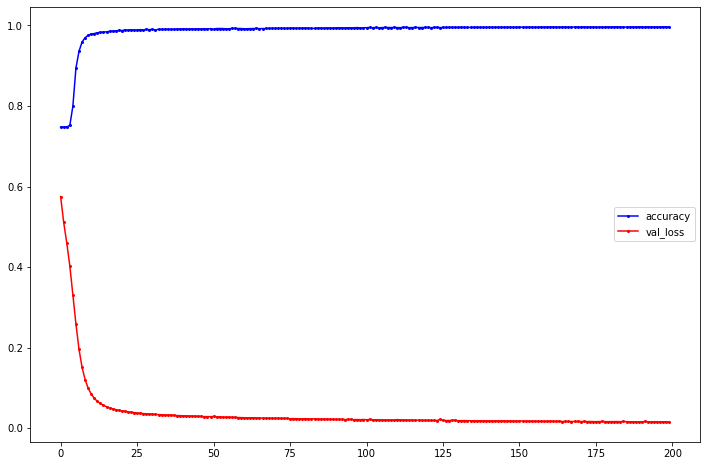

In [12]:
#(14) 훈련과정 시각화하기. 
y_acc = model_fit.history['accuracy']
y_vloss = model_fit.history['val_loss']
x_len = np.arange(len(y_acc))
plt.figure(figsize=(12,8))
plt.plot(x_len, y_acc, 'bo-', markersize=2, label='accuracy')
plt.plot(x_len, y_vloss, 'ro-', markersize=2, label='val_loss')
plt.legend()
plt.show()

In [13]:
#02. Best Model 탐색 후 훈련 중단하기. 
#(1)모델 저장 경로 지정하기. 
model_path = '../../model/wine_best_model.h5' 

#(2) checkpointer 객체 할당하기. 
checkpointer = ModelCheckpoint(
    model_path, monitor='val_loss', verbose=1, save_best_only=True
)

#(3) earlystopping 객체 할당하기. 
early_stopping = EarlyStopping(patience=50)

#(4) 모델 학습하기. 
model_fit = model.fit(
    X_train,y_train,
    validation_split=0.2,
    epochs=3000, 
    batch_size=250, 
    verbose=0, 
    callbacks=[checkpointer, early_stopping]
)


Epoch 00001: val_loss improved from inf to 0.01525, saving model to ../../model\wine_best_model.h5

Epoch 00002: val_loss improved from 0.01525 to 0.01516, saving model to ../../model\wine_best_model.h5

Epoch 00003: val_loss improved from 0.01516 to 0.01515, saving model to ../../model\wine_best_model.h5

Epoch 00004: val_loss improved from 0.01515 to 0.01510, saving model to ../../model\wine_best_model.h5

Epoch 00005: val_loss improved from 0.01510 to 0.01503, saving model to ../../model\wine_best_model.h5

Epoch 00006: val_loss did not improve from 0.01503

Epoch 00007: val_loss improved from 0.01503 to 0.01483, saving model to ../../model\wine_best_model.h5

Epoch 00008: val_loss did not improve from 0.01483

Epoch 00009: val_loss did not improve from 0.01483

Epoch 00010: val_loss did not improve from 0.01483

Epoch 00011: val_loss did not improve from 0.01483

Epoch 00012: val_loss did not improve from 0.01483

Epoch 00013: val_loss did not improve from 0.01483

Epoch 00014: va

In [14]:
#(5) best 모델 할당하기. 
best_model = load_model('../../model/wine_best_model.h5')

#(6) 모델 예측 및 평가하기. 
accuracy_score = best_model.evaluate(X_test, y_test)
accuracy_score

41/41 [==============================] - 0s 389us/step - loss: 0.0165 - accuracy: 0.9962


[0.01647336222231388, 0.9961538314819336]